In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Z-iSBHZe2OFEDpFIGna-sSOWdCE_gzrU3o9_pk_lOWU3',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'maternalhealthsdgproject-donotdelete-pr-dczp5zisrw4ygl'
object_key = 'NFHS2_Data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1.head(63)


,Column1,Number of Women age 15-49 years interviewed,Female population age 6 years and above who ever attended school (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Children under age 5 years whose birth was registered with the civil authority (%),Deaths in the last 3 years registered with the civil authority (%),Population living in households with an improved drinking-water source1 (%),Population living in households that use an improved sanitation facility2 (%),Households using clean fuel for cooking3 (%),...,Women (age 30-49 years) Ever undergone a breast examination for breast cancer (%),Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%),Women (age 15-49 years) who have comprehensive knowledge24 of HIV/AIDS (%),Women (age 15-49 years) who know that consistent condom use can reduce the chance of getting HIV/AIDS (%),Women (age 15-49 years) owning a house and/or land (alone or jointly with others) (%),Women (age 15-49 years) having a bank or savings account that they themselves use (%),Women (age 15-49 years) having a mobile phone that they themselves use (%),Women age 15-24 years who use hygienic methods of protection during their menstrual period26 (%),State,"MMR (per 100,000 live births)"
0,India,724115,71.8,1020.0,929.0,89.1,70.8,95.9,70.2,58.6,...,0.9,0.9,21.6,68.4,43.3,78.6,54.0,77.3,India (National),97.0
1,Andaman & Nicobar Islands,2397,83.5,963.0,914.0,97.4,90.9,96.3,88.0,79.8,...,1.6,10.1,14.9,76.3,15.8,89.2,80.8,98.9,Andhra Pradesh,58.0
2,Andhra Pradesh,10975,65.6,1045.1,933.6,92.2,80.2,96.7,77.3,83.6,...,0.8,7.3,24.6,63.0,47.8,81.8,48.9,85.1,Assam,195.0
3,Arunachal Pradesh,19765,71.2,997.0,979.0,87.7,34.5,93.7,82.9,53.2,...,0.3,0.6,12.3,62.2,70.2,78.2,76.4,91.8,Bihar,118.0
4,Assam,34979,78.2,1012.0,964.0,96.3,65.5,86.0,68.6,42.1,...,0.2,0.2,19.2,71.5,42.7,78.5,57.2,66.3,Chhattisgarh,137.0
5,Bihar,42483,61.1,1090.0,908.0,75.6,37.1,99.2,49.4,37.8,...,0.3,0.3,10.3,57.4,55.3,76.7,51.4,58.8,Gujarat,70.0
6,Chandigarh,746,86.7,917.0,838.0,97.6,93.6,99.1,85.0,95.8,...,0.0,0.4,20.3,72.3,30.4,87.1,70.0,93.4,Haryana,101.0
7,Chhattisgarh,28468,69.3,1015.0,960.0,96.6,77.0,95.5,76.8,33.0,...,0.2,0.2,23.1,75.6,45.6,80.3,40.7,68.8,Himachal Pradesh,54.0
8,Dadra and Nagar Haveli & Daman and Diu,2713,74.4,827.0,817.0,98.1,95.4,95.4,65.8,79.9,...,0.2,0.3,25.3,63.8,55.8,83.6,60.5,93.6,Jammu & Kashmir,46.0
9,Goa,2030,89.0,1027.0,838.0,100.0,100.0,98.5,87.9,96.5,...,1.3,0.6,49.0,90.1,23.2,88.3,91.2,96.8,Jharkhand,56.0


/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


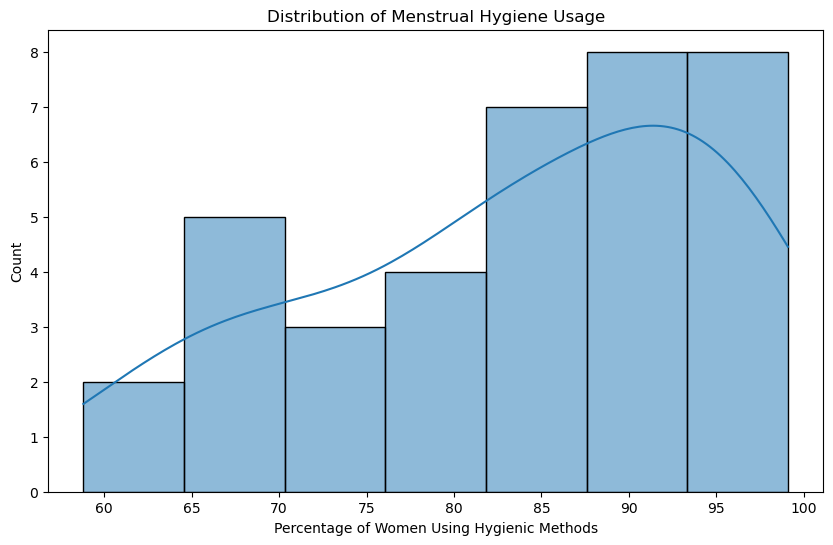

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_1['Women age 15-24 years who use hygienic methods of protection during their menstrual period26 (%)'], kde=True)
plt.title('Distribution of Menstrual Hygiene Usage')
plt.xlabel('Percentage of Women Using Hygienic Methods')
plt.show()


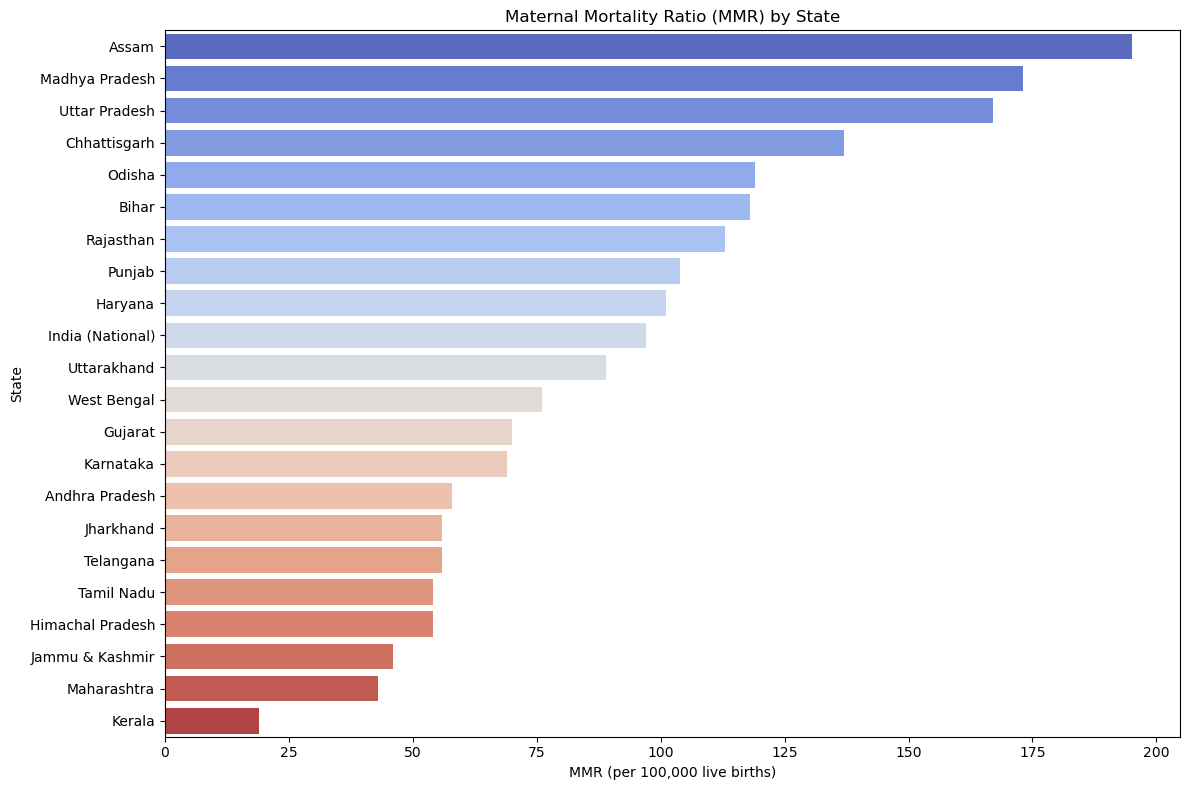

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by MMR for better visualization
df_sorted = df_1.sort_values('MMR (per 100,000 live births)', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_sorted, x='MMR (per 100,000 live births)', y='State', palette='coolwarm')
plt.title('Maternal Mortality Ratio (MMR) by State')
plt.xlabel('MMR (per 100,000 live births)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


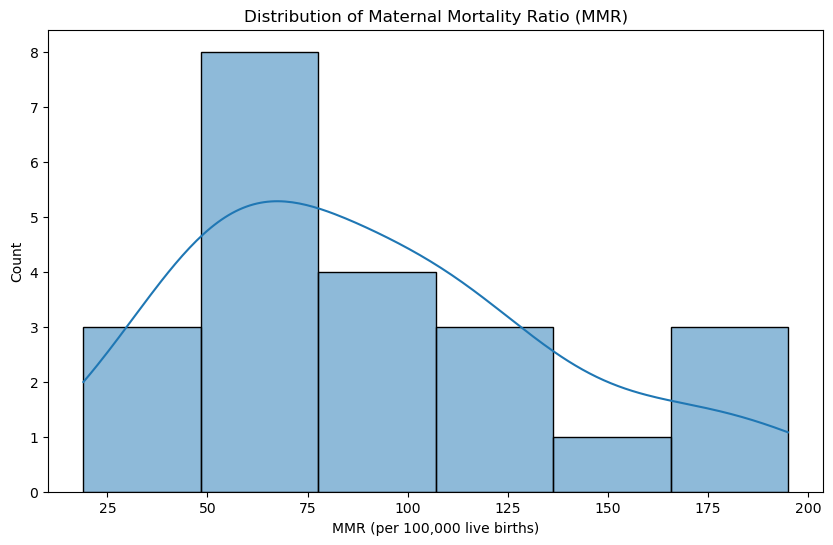

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df_1['MMR (per 100,000 live births)'], kde=True)
plt.title('Distribution of Maternal Mortality Ratio (MMR)')
plt.xlabel('MMR (per 100,000 live births)')
plt.show()


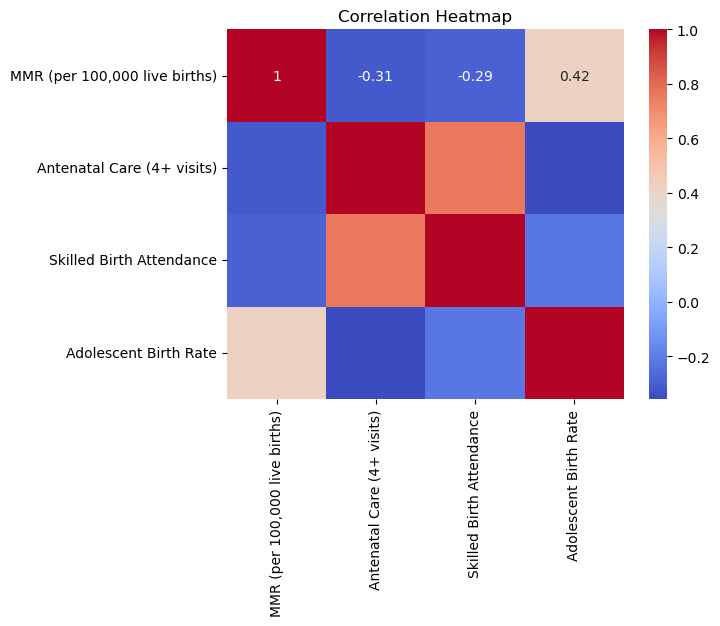

In [16]:
corr = df_1[['MMR (per 100,000 live births)', 'Antenatal Care (4+ visits)', 'Skilled Birth Attendance', 'Adolescent Birth Rate','Health Expenditure (if available)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


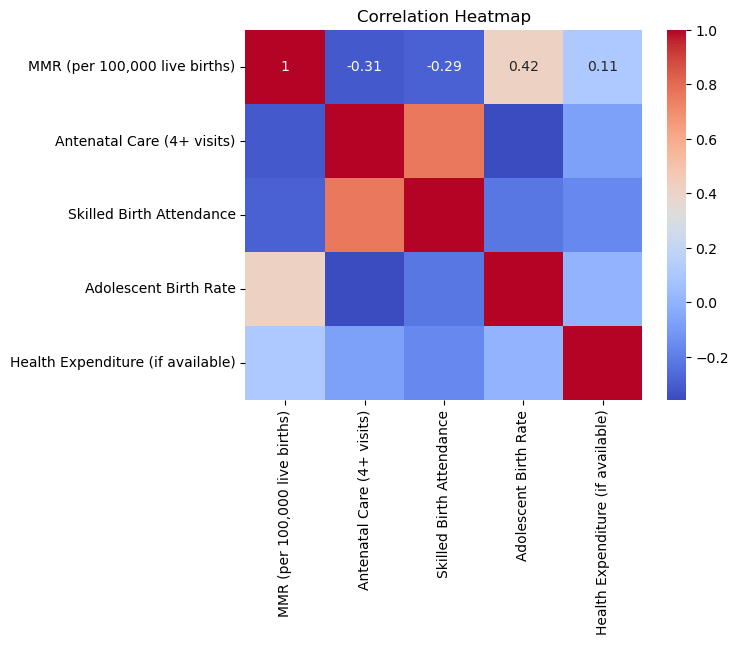

In [17]:
corr = df_1[['MMR (per 100,000 live births)', 'Antenatal Care (4+ visits)', 'Skilled Birth Attendance', 'Adolescent Birth Rate','Health Expenditure (if available)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [20]:
print(df_1['MMR (per 100,000 live births)'].isna().sum())


15


In [22]:
df_1 = df_1.dropna(subset=['MMR (per 100,000 live births)', 
                           'Antenatal Care (4+ visits)', 
                           'Skilled Birth Attendance', 
                           'Adolescent Birth Rate'])


In [23]:
from sklearn.linear_model import LinearRegression

X = df_1[['Antenatal Care (4+ visits)', 'Skilled Birth Attendance', 'Adolescent Birth Rate']]
y = df_1['MMR (per 100,000 live births)']

model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", model.score(X, y))


Coefficients: [-0.05637839 -0.14488883  0.85065429]
Intercept: 80.07210130974997
R^2 Score: 0.17570964963497138


/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


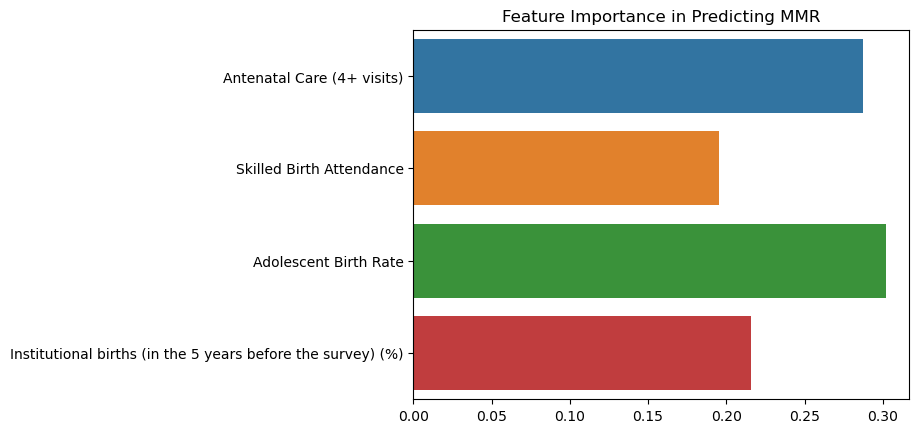

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
feature_importance = rf.feature_importances_
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance in Predicting MMR")
plt.show()
